This notebook describes how to create plots for the netCDF file(s) obtained after executing `DIVAnd`.     
We will use the [NCDatasets](https://github.com/Alexander-Barth/NCDatasets.jl) module (instead of [NetCDF](https://github.com/JuliaGeo/NetCDF.jl)) to read the result files and [PyPlot](https://github.com/JuliaPy/PyPlot.jl).

In [1]:
using NCDatasets  
using PyPlot
if VERSION >= v"0.7.0-beta.0"

else
    println("ok")
    using Compat: @info, @warn, @debug, @error, replace
    using Missings
end
using Compat

ok


In [2]:
?replace

search: replace redisplay



```
replace(string::AbstractString, pat, r[, n::Integer=0])
```

Search for the given pattern `pat`, and replace each occurrence with `r`. If `n` is provided, replace at most `n` occurrences. As with search, the second argument may be a single character, a vector or a set of characters, a string, or a regular expression. If `r` is a function, each occurrence is replaced with `r(s)` where `s` is the matched substring. If `pat` is a regular expression and `r` is a `SubstitutionString`, then capture group references in `r` are replaced with the corresponding matched text.


Adapt the file directory and name.      
We can use for example the salinity analysis produced by [15-example-analysis](./15-example-analysis.ipynb).

In [3]:
datadir = "./data/"
datafile = joinpath(datadir, "Water_body_Salinity.4Danl.nc")
if isfile(datafile)
    @info("File already exists") 
else
    @error("File does not exist")
end

Info: File already exists


Open the dataset from the file for reading

In [4]:
@info("Reading dataset")
ds = Dataset(datafile)

Info: Reading dataset


Dataset: ./data/Water_body_Salinity.4Danl.nc
Group: /

Dimensions
   lon = 76
   lat = 36
   depth = 3
   time = 8
   nv = 2
   observations = 139230
   idlen = 45

Variables
  lon   (76)
    Datatype:    Float64
    Dimensions:  lon
    Attributes:
     units                = degrees_east
     standard_name        = longitude
     long_name            = longitude

  lat   (36)
    Datatype:    Float64
    Dimensions:  lat
    Attributes:
     units                = degrees_north
     standard_name        = latitude
     long_name            = latitude

  depth   (3)
    Datatype:    Float64
    Dimensions:  depth
    Attributes:
     units                = meters
     positive             = down
     standard_name        = depth
     long_name            = depth below sea level

  time   (8)
    Datatype:    Float64
    Dimensions:  time
    Attributes:
     units                = days since 1900-01-01 00:00:00
     standard_name        = time
     long_name            = time
     cal

From the dataset we can extract the dimensions and variables of interest.

In [5]:
lon = ds["lon"];
lat = ds["lat"];
depth = ds["depth"];
ttime = ds["time"];
salinity = ds["Salinity"];

Note that the time variable is an array of dates:

In [6]:
ttime

8-element NCDatasets.CFVariable{Float64,Float64,1}:
 1993-02-16T00:00:00
 1993-05-16T00:00:00
 1993-08-16T00:00:00
 1993-11-16T00:00:00
 1994-02-16T00:00:00
 1994-05-16T00:00:00
 1994-08-16T00:00:00
 1994-11-16T00:00:00

# Create plots
## Simple pseudo color plot
Let's assume we want to plot a given time period at a given depth:

In [7]:
depthplot = 20.;

First we extract the indices of the the time and depth arrays.

In [8]:
timeindex = 4;
depthindex = findall(depth .== depthplot)[1];
@info("Time index: $timeindex")
@info("Depth index: $depthindex")

Info: Time index: 4
Info: Depth index: 2


Then we extract the 2-D salinity field. If we are not sure about the dimension order, we can check the matrix size.

In [9]:
@show size(salinity);
salinityplot = salinity[:, :, depthindex, timeindex];
@show size(salinityplot);
@show typeof(salinityplot);

size(salinity) = (76, 36, 3, 8)
size(salinityplot) = (76, 36)
typeof(salinityplot) = Array{Union{Float32, Missings.Missing},2}


### First plot
We use the `pcolormesh` (pseudo-color) function, after substituting the `missing`s by `NaN`s so that the land is masked.

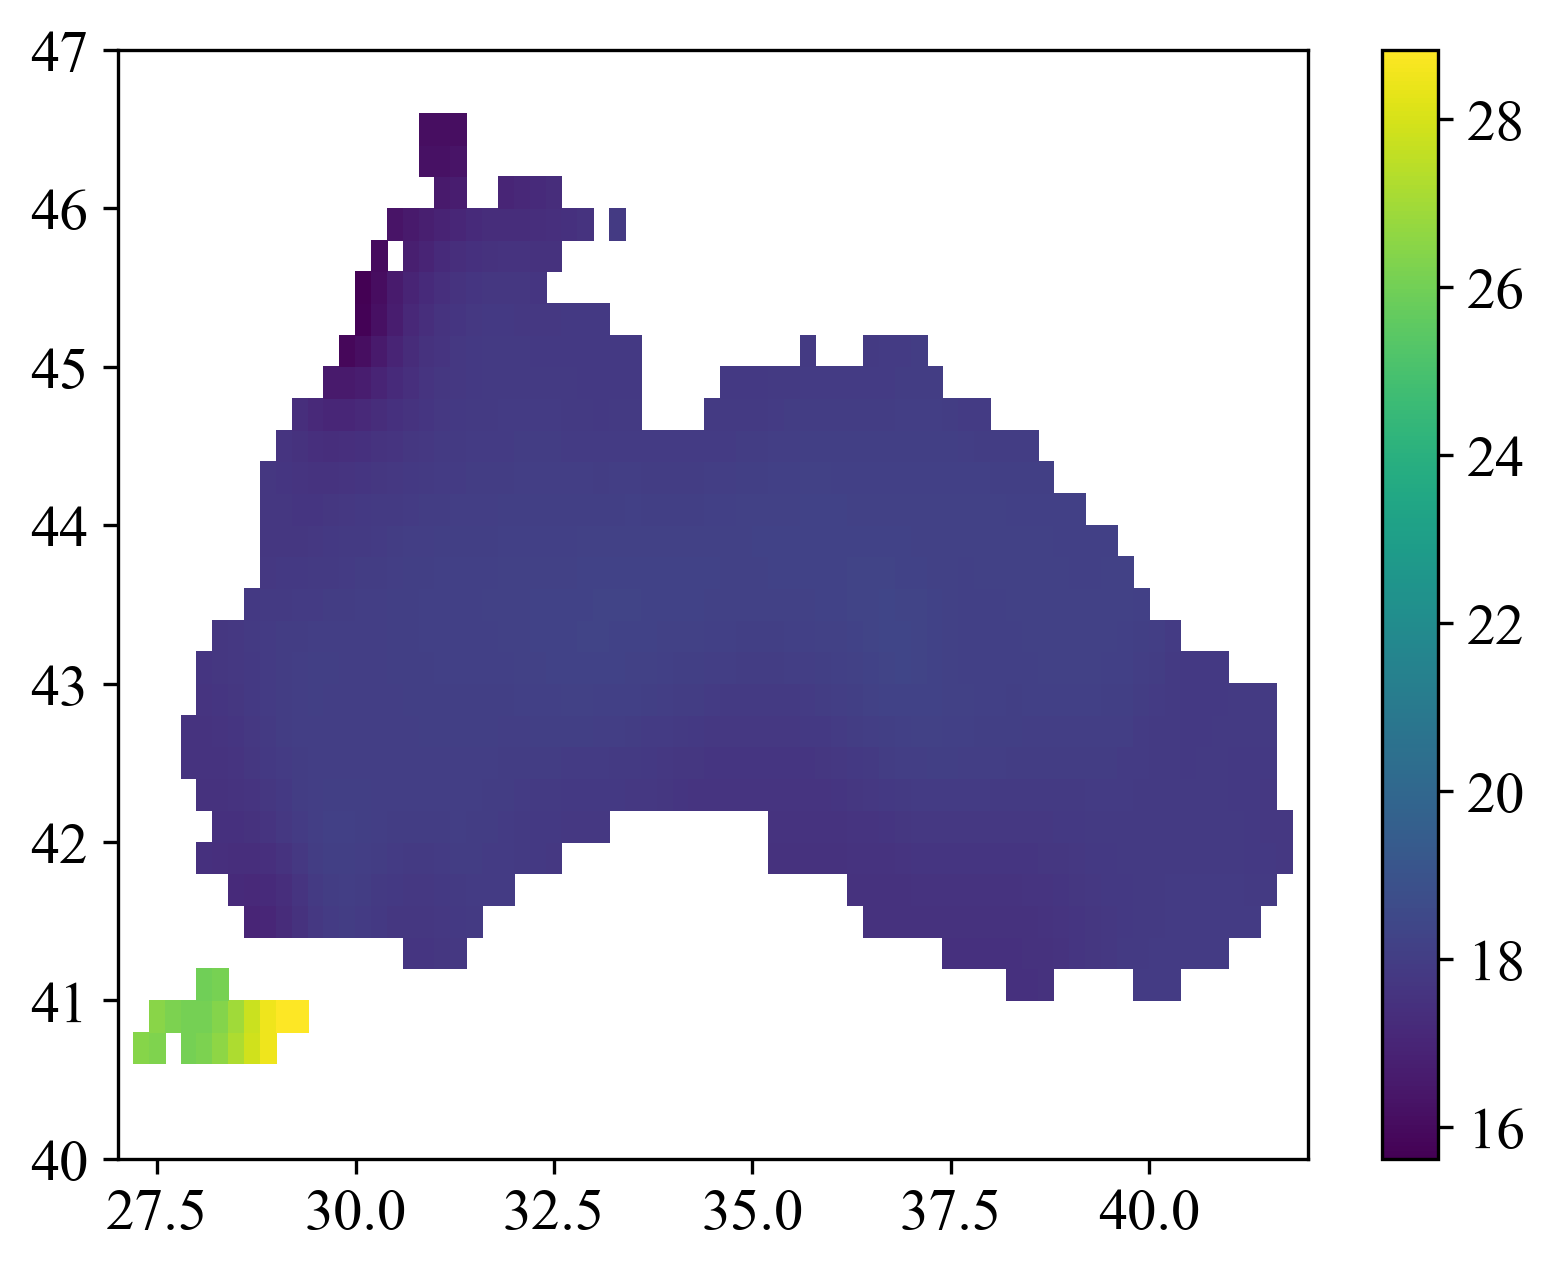

In [10]:
# replace(salinityplot, Missings.missing, NaN) ok with 1.0.0, not with 0.6.4
salinityplot[ismissing.(salinityplot)] .= NaN;
pcolormesh(lon, lat, permutedims(salinityplot, [2, 1]))
colorbar()
show()

## Contour plots
We explicitely specify the levels to be represented (from 15 to 25).    

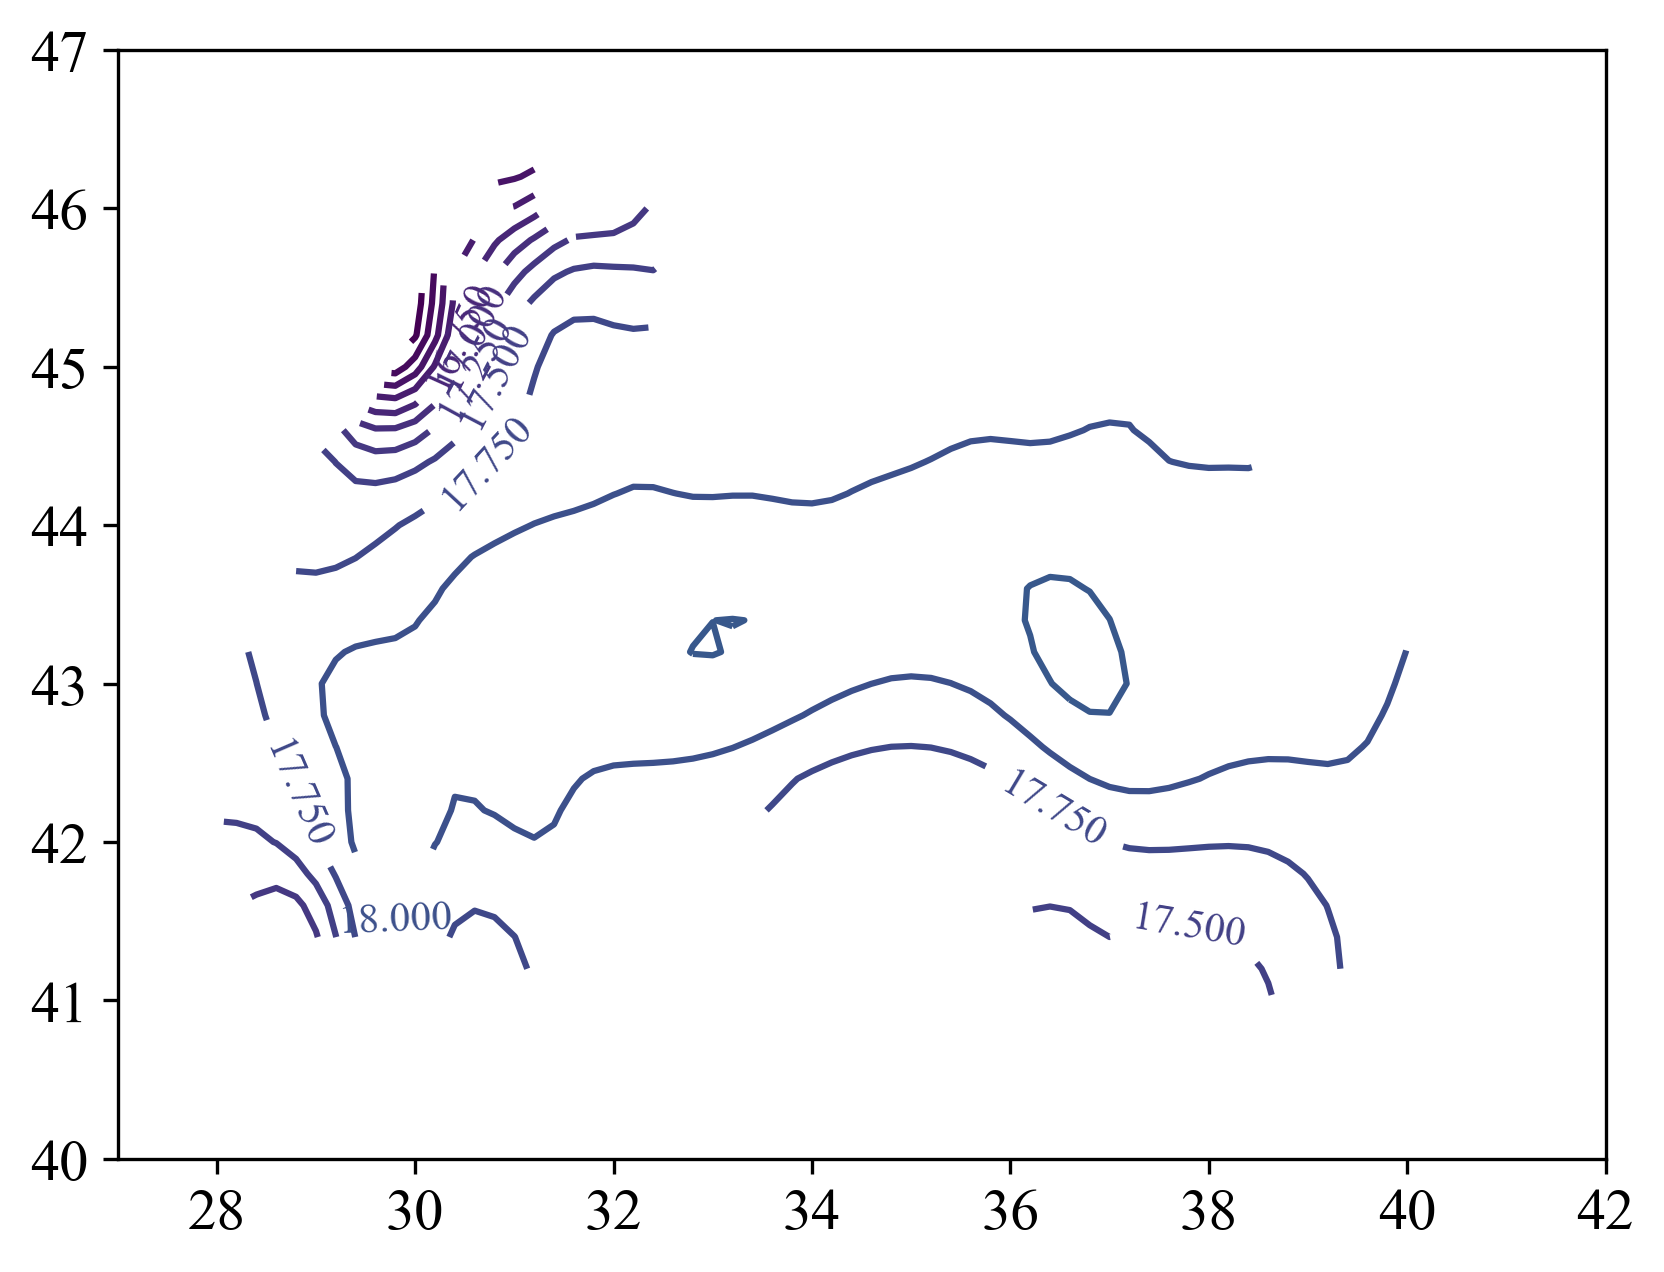

In [11]:
conts = contour(lon, lat, permutedims(salinityplot,[2,1]), levels=collect(15:.25:25))
clabel(conts, inline=1, fontsize=10);

## Filled contour plots
The aspect is somehow different from the pcolor.

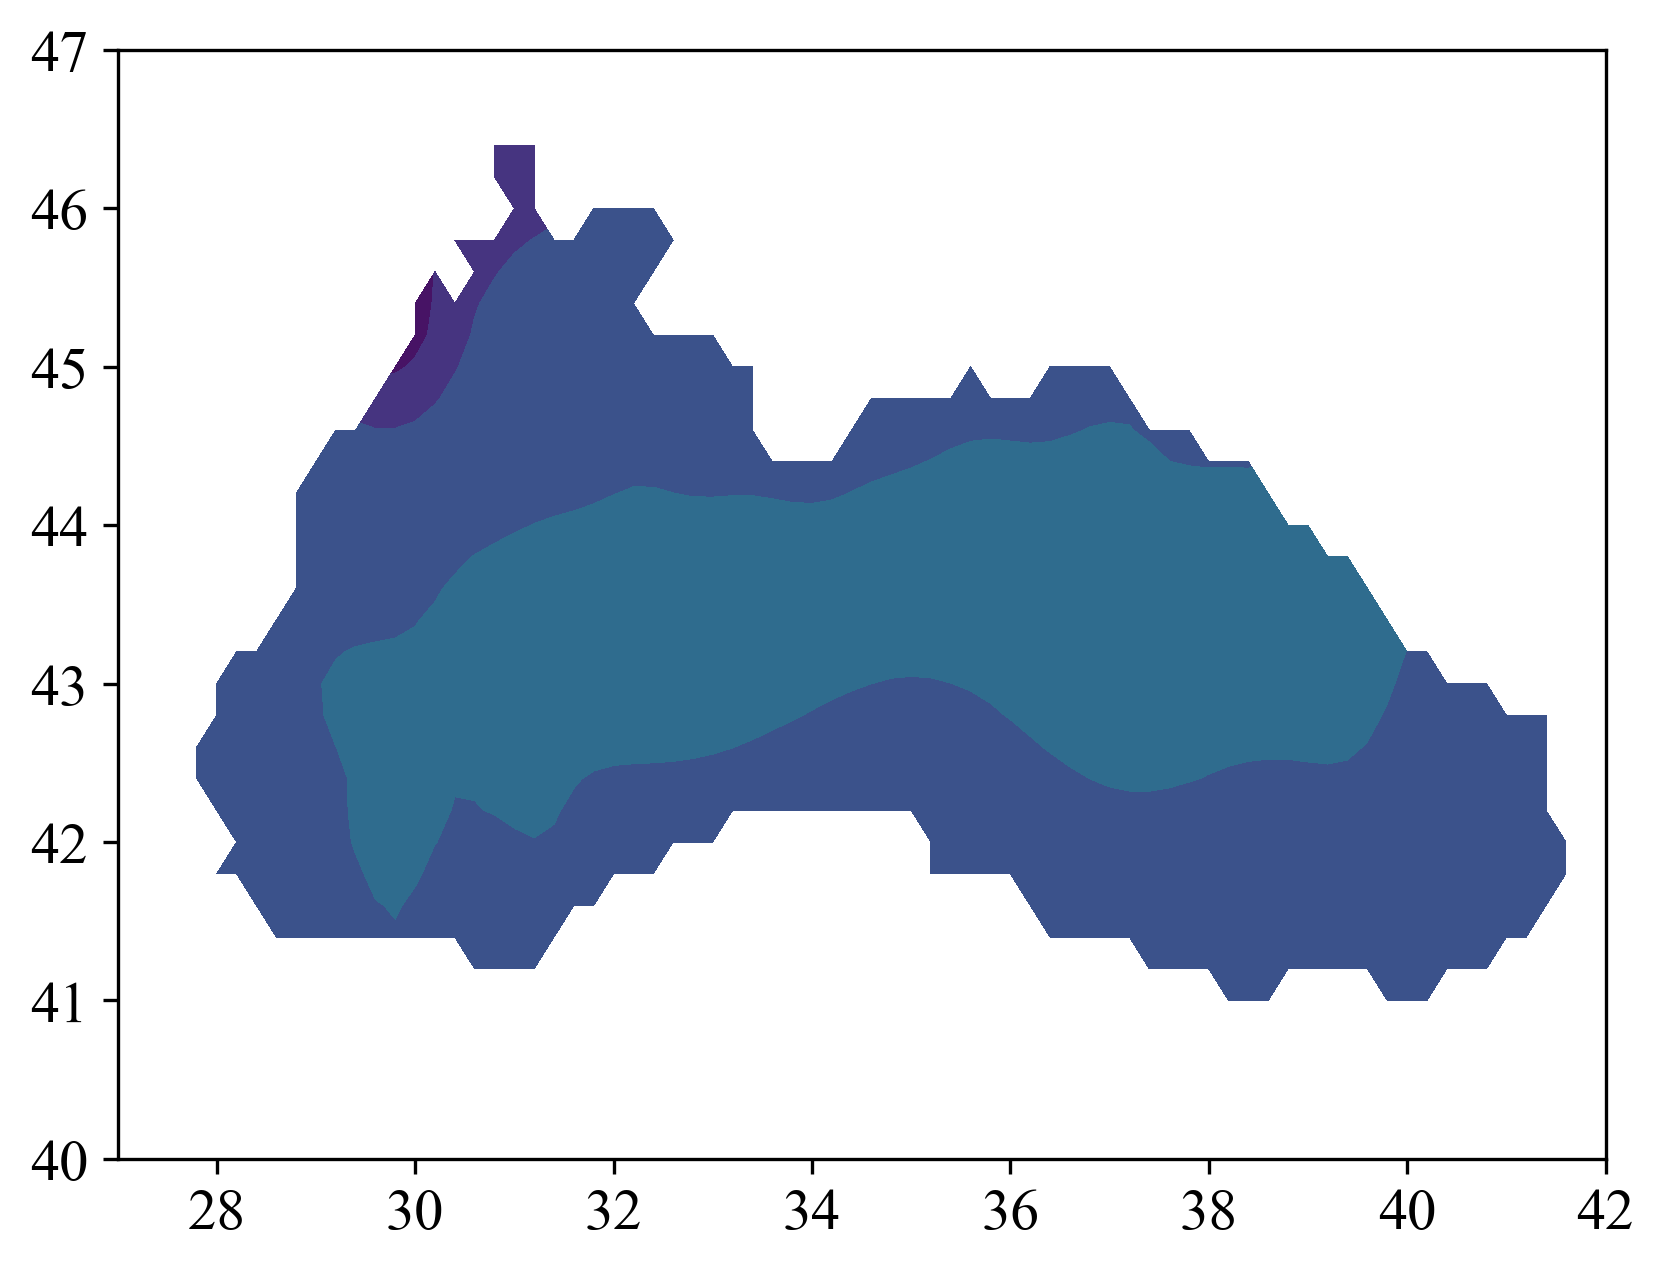

PyObject <matplotlib.contour.QuadContourSet object at 0x7f03df10ef10>

In [12]:
contourf(lon, lat, permutedims(salinityplot,[2,1]), levels=collect(15:1:25))

## Exercise
1. Load the results stored in `Water_body_Salinity.4Danl.nc` (obtained with notebook [15-example-analysis](./15-example-analysis.ipynb)).
2. Load the observation from `Salinity.bigfile` (downloaded in notebook [15-example-analysis](./15-example-analysis.ipynb)).
3. Display the salinity field at 50 meters (for the time period of your choice).
4. Add the observation value at that depth using the `scatter` function.

The solution is available in the notebook [16-plot-results-BlackSea](solutions/16-plot-results-BlackSea.ipynb) and should look like this:

<img src="./Images/BlackSea_plot.png" width="250px">